## Vacuum Neutrino Oscillations

Here is a notebook for homogeneous gas model.

Here we are talking about a homogeneous gas bulk of neutrinos with single energy. The EoM is
$$
i \partial_t \rho_E = \left[ \frac{\delta m^2}{2E}B ,\rho_E \right]
$$

while the EoM for antineutrinos is
$$
i \partial_t \bar\rho_E = \left[- \frac{\delta m^2}{2E}B ,\bar\rho_E \right]
$$

Initial:
Homogeneous, Isotropic, Monoenergetic $\nu_e$ and $\bar\nu_e$

The equations becomes
$$
i \partial_t \rho_E = \left[ \frac{\delta m^2}{2E} B  ,\rho_E \right]
$$
$$
i \partial_t \bar\rho_E = \left[- \frac{\delta m^2}{2E}B,\bar\rho_E \right]
$$



Define $\omega=\frac{\delta m^2}{2E}$,  $\omega = \frac{\delta m^2}{-2E}$, $\mu=\sqrt{2}G_F n_\nu$
$$
i \partial_t \rho_E = \left[ \omega B ,\rho_E \right]
$$
$$
i \partial_t \bar\rho_E = \left[\bar\omega B,\bar\rho_E \right]
$$


where

$$
B = \frac{1}{2} \begin{pmatrix} 
-\cos 2\theta_v & \sin 2\theta_v \\
\sin 2\theta_v & \cos 2\theta_v
\end{pmatrix}
$$

or just use theta =0.2rad


$$
L = \begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}
$$

Initial condition 
$$
\rho(t=0) = \begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}
$$

$$
\bar\rho(t=0) =\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}
$$

define the following quantities

1. hbar$=\hbar$
%2. delm2E$= \delta m^2/2E$
%3. lamb $= \lambda$, lambb $= \bar\lambda$
%4. gF $= G_F$
%5. mu $=\mu$
6. omega $=\omega$, omegab $=-\bar\omega$

## Numerical

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline
%load_ext snakeviz

import numpy as np
from scipy.optimize import minimize
from scipy.special import expit
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

import timeit

import pandas as pd

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [2]:
# hbar=1.054571726*10**(-34)
hbar=1.0
delm2E=1.0
# lamb=1.0  ## lambda for neutrinos
# lambb=1.0 ## lambda for anti neutrinos
# gF=1.0
# nd=1.0  ## number density
# ndb=1.0   ## number density
omega=1.0
omegab=-1.0

## Here are some matrices to be used

elM = np.array([[1.0,0.0],[0.0,0.0]])
#bM = 1.0/2*np.array( [ [ - 0.38729833462,0.31622776601] , [0.31622776601,0.38729833462] ] )
bM = 1.0/2*np.array( [ [ -np.cos(0.2),np.sin(0.2)] , [np.sin(0.2),np.cos(0.2)] ] )

print bM
## sqareroot of 2
sqrt2=np.sqrt(2.0)

[[-0.49003329  0.09933467]
 [ 0.09933467  0.49003329]]


I am going to substitute all density matrix elements using their corrosponding network expressions.

So first of all, I need the network expression for the unknown functions.

A function is written as

$$ y_i= initial+t_i v_k f(t_i w_k+u_k) ,$$

while it's derivative is

$$v_k f(t w_k+u_k) + t v_k f(tw_k+u_k) (1-f(tw_k+u_k)) w_k .$$

Now I can write down the equations using these two forms.

In [3]:
def trigf(x):
    #return 1/(1+np.exp(-x)) # It's not bad to define this function here for people could use other functions other than expit(x).
    return expit(x)

rho = [[r11, a+ib ], [a-ib,r22]], the following rho4 function is rho4 = [r11,a, b, r22]

In [41]:
## The time derivative part

### Here are the initial conditions

init = np.array( [1.0, 0.0, 0.0, 0.0] )

### For neutrinos

def rho4(x,ti,initialCondition): # x is the input structure arrays, ti is a time point

    elem0 = np.sum(ti * x[0] * trigf( ti*x[1] + x[2] ) )
    elem1 = np.sum(ti * x[3] * trigf( ti*x[4] + x[5] ) )
    elem2 = np.sum(ti * x[6] * trigf( ti*x[7] + x[8] ) )
    elem3 = np.sum(ti * x[9] * trigf( ti*x[10] + x[11] ) )
    
    return initialCondition + np.array([ elem0 , elem1, elem2, elem3 ])


In [42]:
## Test
xtemp=np.ones(12)
rho4(xtemp,1,init)

array([ 1.88079708,  0.88079708,  0.88079708,  0.88079708])

In [43]:
## Define Hamiltonians for both

hamilv = delm2E*bM.flatten()

print hamilv

[-0.49003329  0.09933467  0.09933467  0.49003329]


In [44]:
## Test

print bM

print hamilv

[[-0.49003329  0.09933467]
 [ 0.09933467  0.49003329]]
[-0.49003329  0.09933467  0.09933467  0.49003329]


A function is written as

$$ y_i= initial+t_i v_k f(t_i w_k+u_k) ,$$

while it's derivative is

$$v_k f(t w_k+u_k) + t v_k f(tw_k+u_k) (1-f(tw_k+u_k)) w_k .$$

In [39]:
## The COST of the eqn set
#remember that commutator is[1.0j* e0, e1 + 1.0j*e2 ,  - e1 + 1.0j*e2  ,1.0j*e3 ], where exs are the elements of the commv

regularization = 0.0001
npsum = np.sum

def costvTi(x,ti,initialCondition): # l is total length of x
    
    list = np.linspace(0,3,4)

    fvec = []
    rho4i = rho4(x,ti,initialCondition)
    a0 = 2.0*rho4i[2]*hamilv[1]
    a1 = -2.0*rho4i[2]*hamilv[0]
    a2 = 2.0*rho4i[1]*hamilv[0] + hamilv[1]*( rho4i[3] - rho4i[0] )
    a3 = -2.0*rho4i[2]*hamilv[2]
    added = np.array([a0,a1,a2,a3])
    fvecappend = fvec.append
    
    for i in list:
        fvecappend(np.asarray(trigf(ti*1.0*x[i*3+1] + 1.0*x[i*3+2]) ) )
        
    fvec = np.array(fvec)
    
    rhoprime = np.zeros(4)
    
    for i in list:
        rhoprime[i] = ( np.sum (1.0*x[i*3]*fvec[i] + 1.0*ti * x[i*3]* fvec[i] * ( 1.0 -  fvec[i]  ) * x[i*3+1] )  )

    costi = rhoprime + added
    
    costiTemp = np.sum(costi**2)

    
    return costiTemp


In [40]:
print costvTi(xtemp,2,init)

11.7835898849


In [10]:
## Calculate the total cost

def costv(x,t,initialCondition):

    t = np.array(t)
    
    costvTotal = np.sum( costvTList(x,t,initialCondition)  )
        
    return costvTotal
    

def costvTList(x,t,initialCondition):  ## This is the function WITHOUT the square!!! 
        
    t = np.array(t)
    
    costvList = np.asarray([])
    
    for temp in t:
        tempElement = costvTi(x,temp,initialCondition)
        costvList = np.append(costvList, tempElement)
        
    return np.array(costvList)

    

In [11]:
ttemp = np.linspace(0,10)
print ttemp

[  0.           0.20408163   0.40816327   0.6122449    0.81632653
   1.02040816   1.2244898    1.42857143   1.63265306   1.83673469
   2.04081633   2.24489796   2.44897959   2.65306122   2.85714286
   3.06122449   3.26530612   3.46938776   3.67346939   3.87755102
   4.08163265   4.28571429   4.48979592   4.69387755   4.89795918
   5.10204082   5.30612245   5.51020408   5.71428571   5.91836735
   6.12244898   6.32653061   6.53061224   6.73469388   6.93877551
   7.14285714   7.34693878   7.55102041   7.75510204   7.95918367
   8.16326531   8.36734694   8.57142857   8.7755102    8.97959184
   9.18367347   9.3877551    9.59183673   9.79591837  10.        ]


In [12]:
ttemp = np.linspace(0,10)
print costvTList(xtemp,ttemp,init)
print costv(xtemp,ttemp,init)

[   2.00241504    2.52486601    3.12957558    3.82314867    4.61583765
    5.52007582    6.548817      7.71415413    9.0264291    10.49383832
   12.12242401   13.91630864   15.87804541   18.00899333   20.30966179
   22.77999828   25.41961232   28.22793954   31.20435522   34.34824788
   37.65906304   41.13632579   44.77964879   48.58873118   52.56335186
   56.70335997   61.00866425   65.47922231   70.11503074   74.91611611
   79.88252726   85.01432875   90.31159553   95.77440856  101.40285145
  107.19700781  113.15695936  119.28278448  125.57455727  132.03234697
  138.65621761  145.4462279   152.4024313   159.52487616  166.81360596
  174.26865961  181.89007178  189.67787322  197.63209112  205.75274943]
3592.25842934


## Minimization

Here is the minimization

In [26]:
endpoint = 10
tlin = np.linspace(0,endpoint,20)
# tlinTest = np.linspace(0,14,10) + 0.5
# initGuess = np.ones(120)
# initGuess = np.asarray(np.split(np.random.rand(1,720)[0],12))
initGuess = np.asarray(np.split(np.random.rand(1,60)[0],12))
    


costvF = lambda x: costv(x,tlin,init)
#costvFTest = lambda x: costv(x,tlinTest,init)

In [27]:
print costv(initGuess,tlin,init)#, costv(initGuess,tlinTest,init)

10483.2460234


In [28]:
#%%snakeviz
startSLSQP = timeit.default_timer()
costvFResultSLSQP = minimize(costvF,initGuess,method="SLSQP")
stopSLSQP = timeit.default_timer()

print stopSLSQP - startSLSQP

print costvFResultSLSQP

22.0414690971
  status: 0
 success: True
    njev: 44
    nfev: 2745
     fun: 0.029594802355524336
       x: array([ -1.59252118e-03,   3.51014982e+00,   1.65251562e+00,
        -1.74724687e-01,  -2.04199807e-01,  -9.39817008e-01,
         1.19918520e-01,  -1.04374519e-01,  -7.08835998e+00,
         1.56467928e-03,   6.42148180e+00,   2.63351999e+00,
         2.74194493e-01,   6.04660148e-01,   8.27430694e-01,
         9.41868026e-01,   9.55032063e-01,   2.71249180e-01,
         6.63824188e-01,   6.47188705e-01,   8.24388861e-01,
         4.96686894e-01,   8.53520987e-01,   6.36443930e-02,
         3.37829263e-01,   5.43065972e-02,   3.08361127e-01,
         8.36703782e-01,   3.90895320e-01,   1.91154610e-02,
         5.54548230e-02,   5.61579367e-01,   8.69265422e-01,
         3.13275701e-01,   2.83225135e-02,   5.01541153e-01,
         4.92425726e-01,   6.16425625e-01,   9.44842566e-02,
         9.27639463e-01,   7.72354571e-01,   8.12257532e-01,
         6.47191868e-01,   7.6117479

In [29]:
#np.savetxt('./assets/homogen/optimize_ResultSLSQPT2120_Vac.txt', costvFResultSLSQP.get('x'), delimiter = ',')

## Functions

Find the solutions to each elements.

In [30]:
# costvFResultSLSQPx = np.genfromtxt('./assets/homogen/optimize_ResultSLSQP.txt', delimiter = ',')

In [31]:
## The first element of neutrino density matrix
xresult = np.asarray(costvFResultSLSQP.get('x'))
#xresult = np.asarray(costvFResultNM.get('x'))
#xresult = np.asarray(costvFResultBFGS.get('x'))

print xresult

plttlin=np.linspace(0,endpoint,100)

pltdata11 = np.array([])
pltdata11Test = np.array([])
pltdata22 = np.array([])
pltdata12 = np.array([])
pltdata21 = np.array([])

for i in plttlin:
    pltdata11 = np.append(pltdata11 ,rho4(xresult,i,init)[0] )
    
print pltdata11

for i in plttlin:
    pltdata12 = np.append(pltdata12 ,rho4(xresult,i,init)[1] )
    
print pltdata12

for i in plttlin:
    pltdata21 = np.append(pltdata21 ,rho4(xresult,i,init)[2] )
    
print pltdata21

#for i in plttlin:
#    pltdata11Test = np.append(pltdata11Test ,rho(xresultTest,i,init)[0,0] )
#    
#print pltdata11Test


for i in plttlin:
    pltdata22 = np.append(pltdata22 ,rho4(xresult,i,init)[3] )
    
print pltdata22

print rho4(xresult,0,init)

[ -1.59252118e-03   3.51014982e+00   1.65251562e+00  -1.74724687e-01
  -2.04199807e-01  -9.39817008e-01   1.19918520e-01  -1.04374519e-01
  -7.08835998e+00   1.56467928e-03   6.42148180e+00   2.63351999e+00
   2.74194493e-01   6.04660148e-01   8.27430694e-01   9.41868026e-01
   9.55032063e-01   2.71249180e-01   6.63824188e-01   6.47188705e-01
   8.24388861e-01   4.96686894e-01   8.53520987e-01   6.36443930e-02
   3.37829263e-01   5.43065972e-02   3.08361127e-01   8.36703782e-01
   3.90895320e-01   1.91154610e-02   5.54548230e-02   5.61579367e-01
   8.69265422e-01   3.13275701e-01   2.83225135e-02   5.01541153e-01
   4.92425726e-01   6.16425625e-01   9.44842566e-02   9.27639463e-01
   7.72354571e-01   8.12257532e-01   6.47191868e-01   7.61174793e-01
   8.18460476e-01   1.37300048e-01   5.09062206e-01   8.67575780e-01
   1.77022215e-02   8.47841558e-01   4.94487180e-01   5.93556947e-01
   9.99917064e-01   7.53008878e-01   2.76437081e-01   8.67706376e-01
   5.50429901e-01   6.06363724e-01

In [32]:
rho4(xresult,1,init)

array([  9.98416546e-01,  -4.22106245e-02,   9.01145420e-05,
         1.56449654e-03])

In [33]:
#np.savetxt('./assets/homogen/optimize_pltdatar11.txt', pltdata11, delimiter = ',')
#np.savetxt('./assets/homogen/optimize_pltdatar22.txt', pltdata22, delimiter = ',')

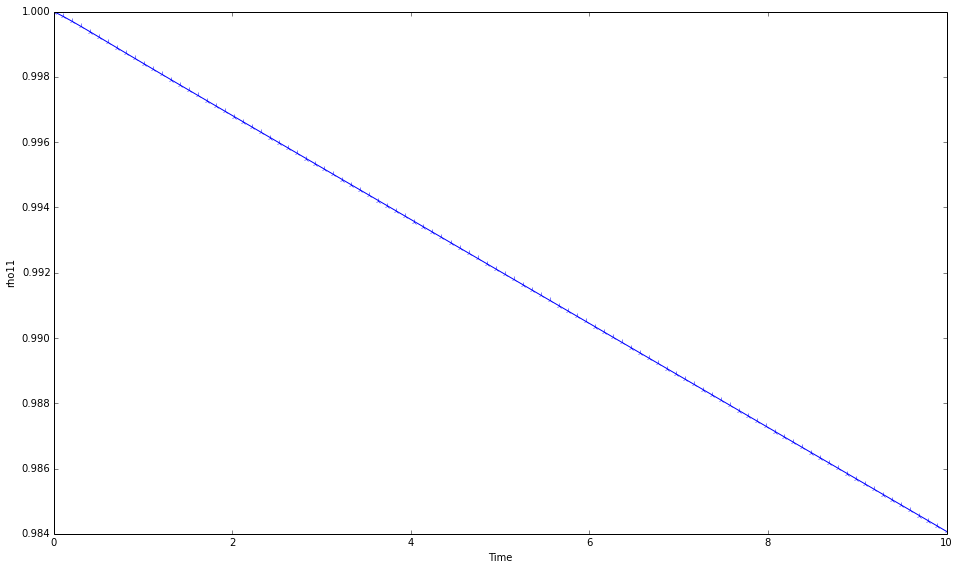

In [34]:
plt.figure(figsize=(16,9.36))
plt.ylabel('rho11')
plt.xlabel('Time')
plt11=plt.plot(plttlin,pltdata11,"b4-",label="vac_rho11")
#plt.plot(plttlin,pltdata11Test,"m4-",label="vac_rho11Test")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="vac_HG-rho11")


# tls.embed("https://plot.ly/~emptymalei/73/")

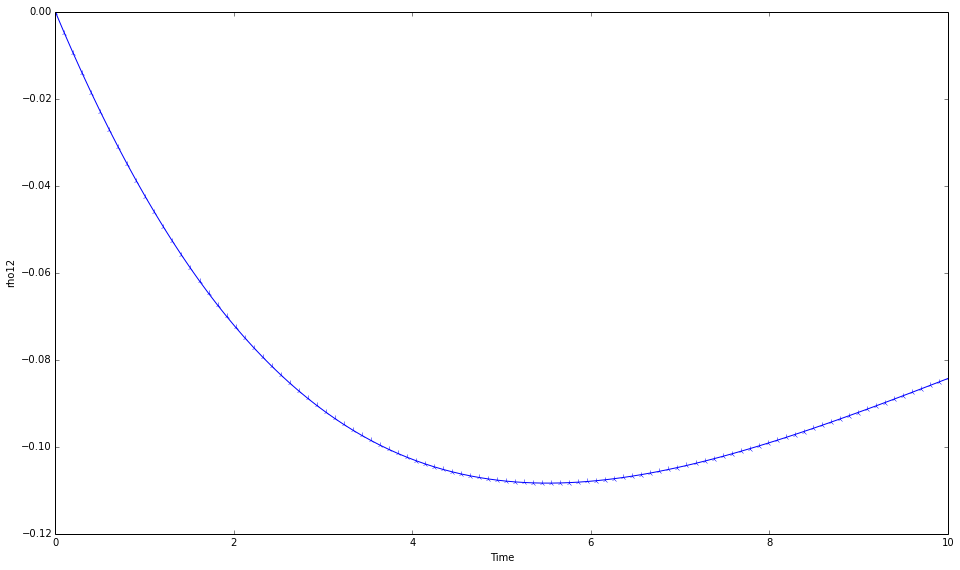

In [35]:
plt.figure(figsize=(16,9.36))
plt.ylabel('rho12')
plt.xlabel('Time')
plt12=plt.plot(plttlin,pltdata12,"b4-",label="vac_rho12")
#plt.plot(plttlin,pltdata11Test,"m4-",label="vac_rho11Test")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="vac_HG-rho11")


# tls.embed("https://plot.ly/~emptymalei/73/")

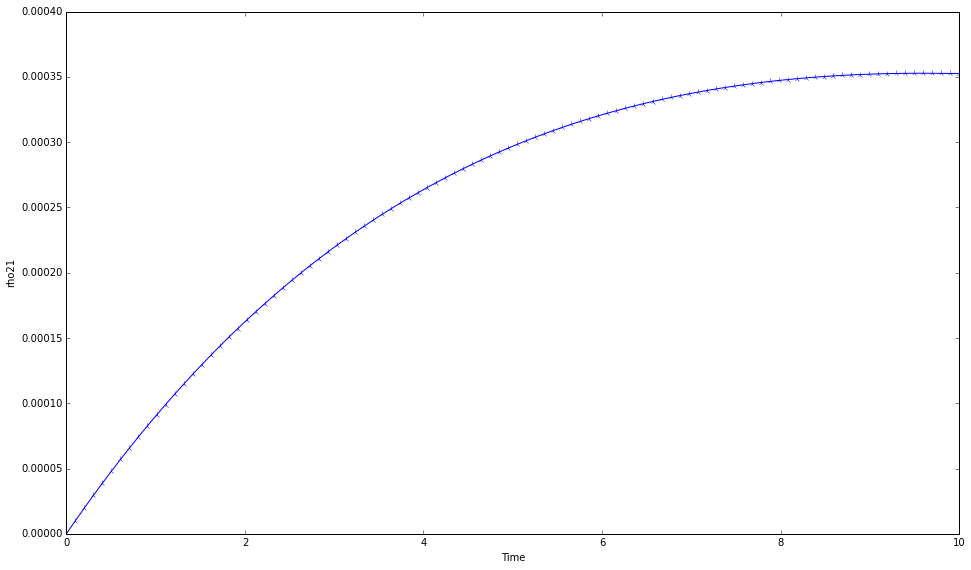

In [36]:
plt.figure(figsize=(16,9.36))
plt.ylabel('rho21')
plt.xlabel('Time')
plt11=plt.plot(plttlin,pltdata21,"b4-",label="vac_rho21")
#plt.plot(plttlin,pltdata11Test,"m4-",label="vac_rho11Test")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="vac_HG-rho11")


# tls.embed("https://plot.ly/~emptymalei/73/")

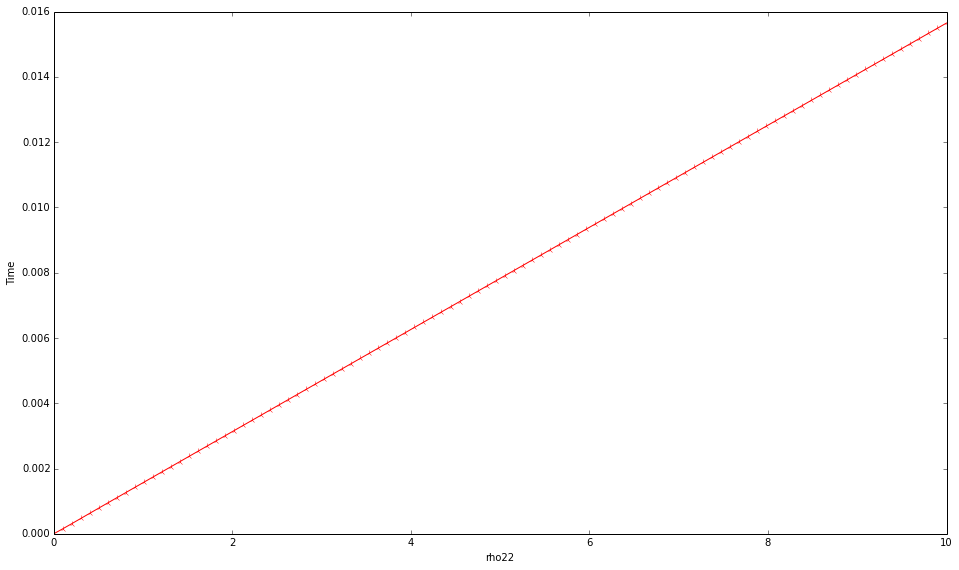

In [37]:
plt.figure(figsize=(16,9.36))
plt.ylabel('Time')
plt.xlabel('rho22')
plt22=plt.plot(plttlin,pltdata22,"r4-",label="vac_rho22")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="vac_HG-rho22")

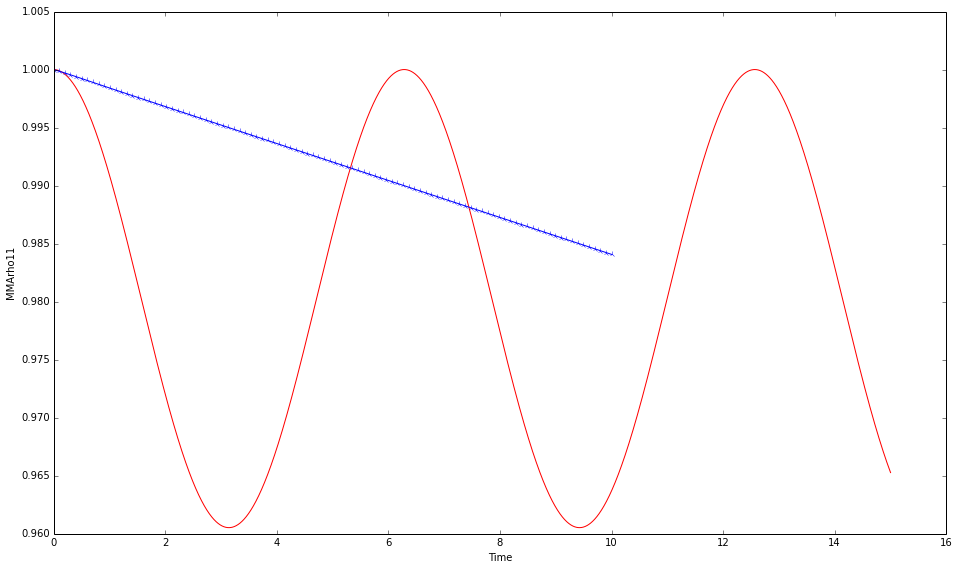

In [38]:
MMA_optmize_Vac_pltdata = np.genfromtxt('./assets/homogen/MMA_optmize_Vac_pltdata.txt', delimiter = ',')

plt.figure(figsize=(16,9.36))
plt.ylabel('MMArho11')
plt.xlabel('Time')
plt.plot(np.linspace(0,15,4501),MMA_optmize_Vac_pltdata,"r-",label="MMAVacrho11")
plt.plot(plttlin,pltdata11,"b4-",label="vac_rho11")
plt.show()
#py.iplot_mpl(plt.gcf(),filename="MMA-rho11-Vac-80-60")

## Practice

In [ ]:
xtemp1 = np.arange(4)
xtemp1.shape = (2,2)
print xtemp1
xtemp1[0,1]
np.dot(xtemp1,xtemp1)
xtemp1[0,1]